In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['font.family'] = 'Malgun Gothic'  # 폰트 적용 (한글 깨짐 방지)
plt.rcParams['font.size'] = 14                 # 폰트 크기
plt.rcParams['figure.figsize'] = (13, 8)       # figsize 를 전역으로 설정
plt.rcParams['axes.unicode_minus'] = False     # -(마이너스) 표기 가능하도록 함

# 데이터 로딩

In [3]:
data = pd.read_csv('Global YouTube Statistics2.csv')

# EDA

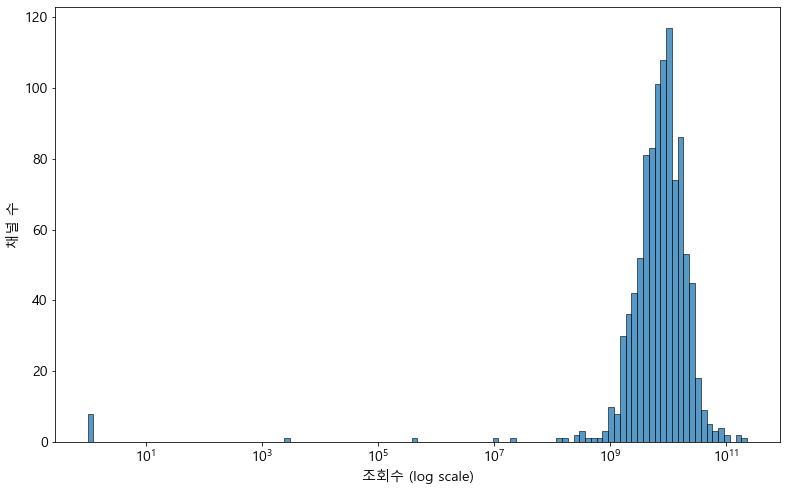

In [4]:
temp = pd.DataFrame()
# temp['subscribers'] = data['subscribers']+1)
temp['조회수'] = data['조회수']+1

sns.histplot(temp, x='조회수', log_scale=True)
plt.xlabel('조회수 (log scale)')
plt.ylabel('채널 수')
plt.show()

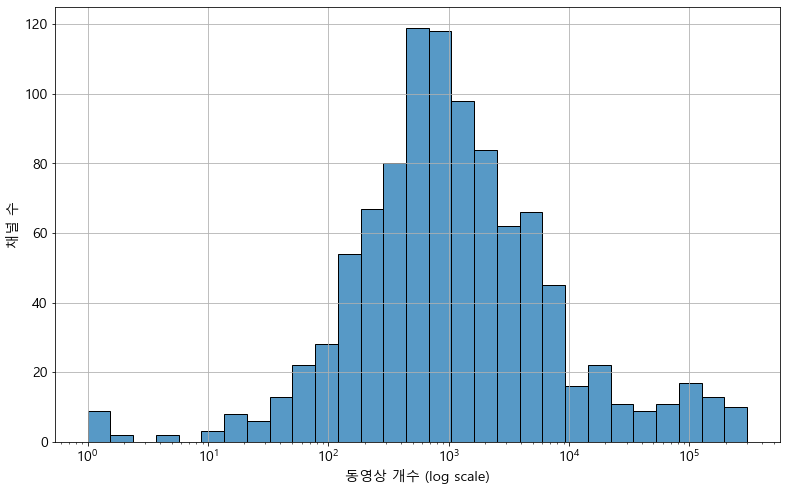

In [5]:
temp['동영상 개수'] = data['동영상 개수']+1
sns.histplot(temp, x='동영상 개수', log_scale=True)
plt.xlabel('동영상 개수 (log scale)')
plt.ylabel('채널 수')
plt.grid()
plt.show()

In [6]:
data['분류'].unique()

array(['Music', 'Film & Animation', 'Entertainment', 'Education', 'Shows',
       'People & Blogs', 'Gaming', 'Sports', 'Howto & Style',
       'News & Politics', 'Comedy', 'Nonprofits & Activism', nan,
       'Science & Technology', 'Pets & Animals', 'Autos & Vehicles'],
      dtype=object)

## 7. 트렌드 토픽

특정 카테고리가 시간이 지남에 따라 인기를 얻고 세계 이벤트와 상관 관계가 있는지 조사합니다.

시간별 분석

In [7]:
len(data['분류'].value_counts())

15

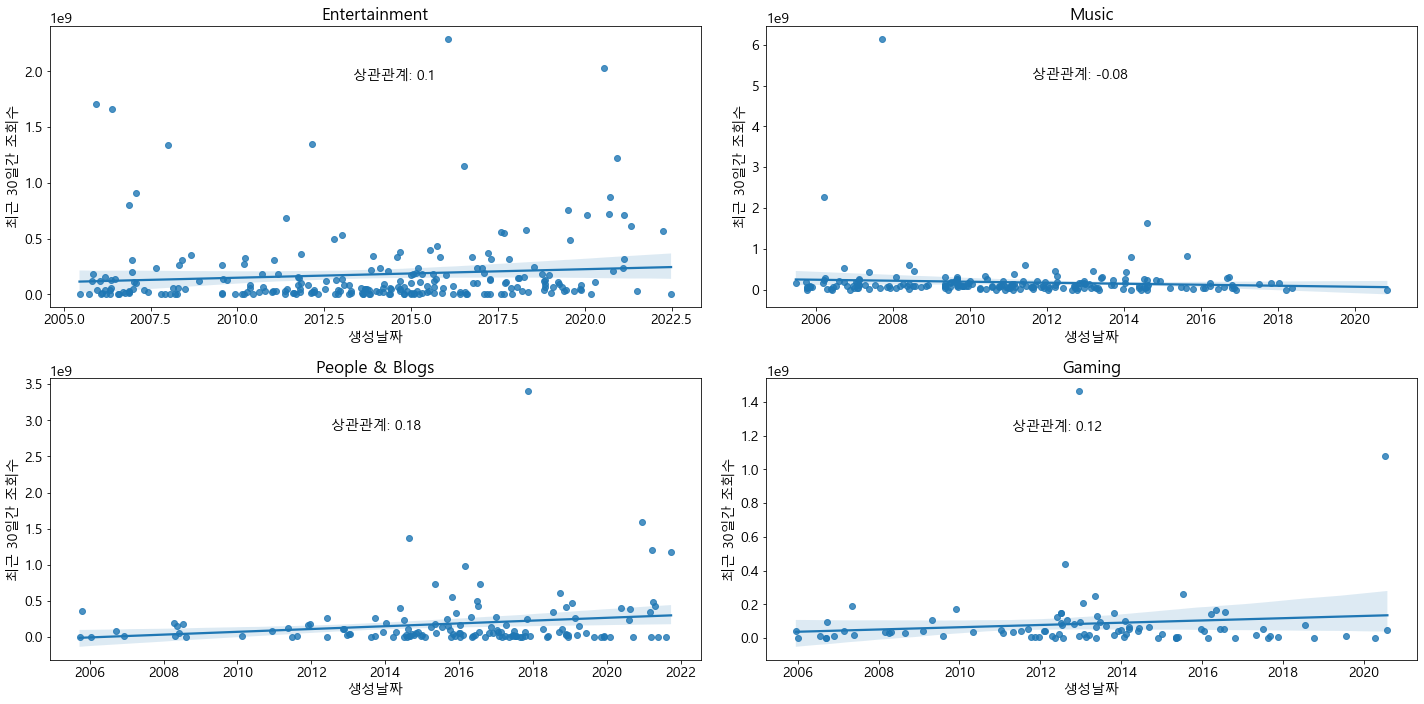

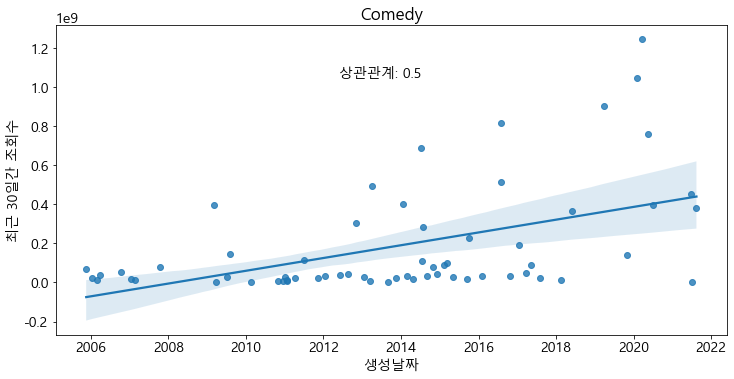

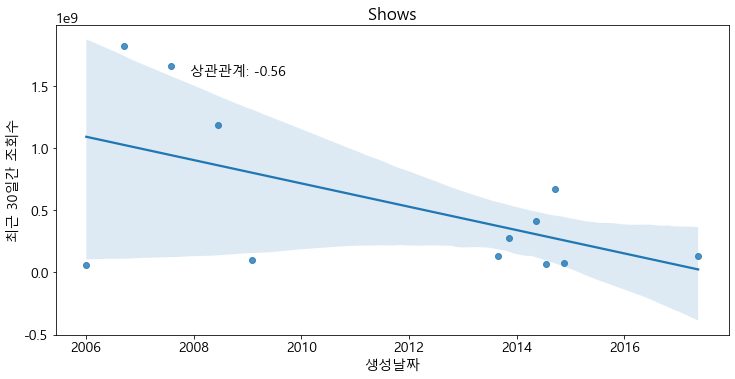

In [13]:
def plot(x, y, cats):
    fig = plt.figure(figsize=(20, 10))
    for idx, cat in enumerate(cats):
        ax = fig.add_subplot(2, 2, idx+1)
        temp = data[data['분류']==cat]
        sns.regplot(temp, x=x, y=y, ax=ax)
        ax.text(x = (ax.get_xlim()[1] - 10), y = ax.get_ylim()[1]*.8,
                s = f'상관관계: {(temp[[x, y]].corr().iloc[0,1]).round(2)}')
        plt.title(cat)

    plt.tight_layout()
    plt.show()
    
x = '생성날짜'
y = '조회수'
y = '최근 30일간 조회수'
cats = ['Film & Animation', 'Education', 'Shows', 'Sports', 'Pets & Animals']
cats = ['Entertainment', 'Music', 'People & Blogs', 'Gaming', 'Comedy',
       'Film & Animation', 'Education', 'Howto & Style', 'News & Politics',
       'Science & Technology', 'Shows', 'Sports', 'Pets & Animals',]
plot(x, y, cats[:4])
plot(x, y, cats[4:5])
plot(x, y, cats[10:11])


- 각 카테고리마다 시간순으로 변화하는 비디오 시청수를 확인
    - (시간순이 아닌) 생성날짜에 따른 비디오 시청수의 차이가 확연히 존재하는 카테고리가 존재한다

In [14]:
data[data['분류']=='Shows']

,구독자 순위,채널명,구독자수,조회수,분류,제목,동영상 개수,나라,국가코드,조회수 순위,...,고등교육 등록비율(%),인구,실업률,도시인구,위도,경도,생성날짜,*유지년수*,*30일간 평균 업로드*,[영상별 평균 조회수]
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,3.0,...,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,2006.717808,16.863014,575.895478,7.313837e+08
15,16,Sony SAB,83000000,1.010000e+11,Shows,Sony SAB,71270,India,IN,4.0,...,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,2007.589041,15.991781,371.388699,5.263120e+08
26,27,Colors TV,64600000,6.151091e+10,Shows,Colors TV,112915,India,IN,10.0,...,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,2008.448087,15.132734,621.803240,3.387298e+08
67,68,Masha and The Bear,42400000,2.451902e+10,Shows,Masha and The Bear,1218,United States,US,74.0,...,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,2014.709589,8.871233,11.441476,2.303233e+08
89,90,Sony PAL,38200000,2.851934e+10,Shows,Sony PAL,24089,India,IN,49.0,...,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,2014.350685,9.230137,217.485035,2.574839e+08
137,138,Mr Bean,32100000,1.060224e+10,Shows,Mr Bean,3091,United Kingdom,GB,400.0,...,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973,2006.008219,17.572603,14.658235,5.027825e+07
293,294,Kids TV - Nursery Rhymes And Baby Songs,23100000,1.315187e+10,Shows,Kids TV - Nursery Rhymes And Baby Songs,3781,United States,US,282.0,...,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,2013.660274,9.920548,31.760678,1.104767e+08
415,416,Sony AATH,19600000,1.393002e+10,Shows,Sony AATH,18661,United States,US,257.0,...,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,2013.865753,9.715068,160.069209,1.194881e+08
440,441,Masha e o Urso,18900000,8.301731e+09,Shows,Masha e o Urso,1100,Brazil,BR,4057944.0,...,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280,2016.125683,7.455139,12.295769,9.279652e+07
491,492,MGC Playhouse,17900000,1.617453e+10,Shows,MGC Playhouse,1426,United States,US,187.0,...,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,2009.090411,14.490411,8.200826,9.301858e+07


In [9]:
# category = data['분류'].value_counts().reset_index()
# category.columns = ['분류', '채널 수']

columns = ['동영상 개수', '구독자수']
category = data.groupby('분류')[columns].sum()
category = category.sort_values(by='구독자수', ascending=False).reset_index()
category['분류'] = (category.index + 1).astype(str) + '. ' + category['분류']

category

,분류,동영상 개수,구독자수
0,1. Entertainment,3156187,5553100000
1,2. Music,557464,5388700000
2,3. People & Blogs,1439312,2943000000
3,4. Gaming,431753,2145400000
4,5. Film & Animation,164312,1427700000
5,6. Comedy,82663,1407300000
6,7. Education,145903,1273600000
7,8. Howto & Style,81739,794900000
8,9. Shows,357868,541000000
9,10. News & Politics,3034588,536400000


#### 메모리 청소

In [10]:
import gc # garbage collector : 필요없는 메모리를 다시 가져옴.
gc.collect()

52319